___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from sklearn.cluster import KMeans
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


#### Load Dataset

In [2]:
#here, we read our data using the read_csv method.
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
#display the columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
#show further data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#display compute statistics within the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.duplicated().sum().any()

False

In [7]:
df.isnull().sum().any()

False

In [8]:
df['CustomerID'].nunique()

200

In [9]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [10]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

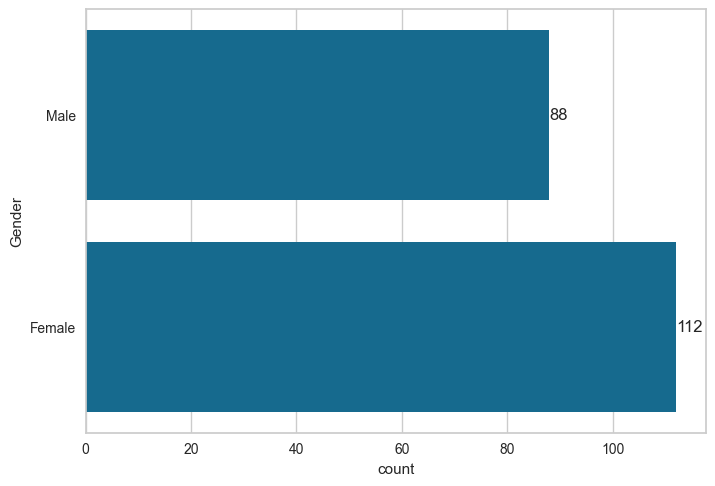

In [11]:
ax = sns.countplot(df['Gender'])
ax.bar_label(ax.containers[0]);

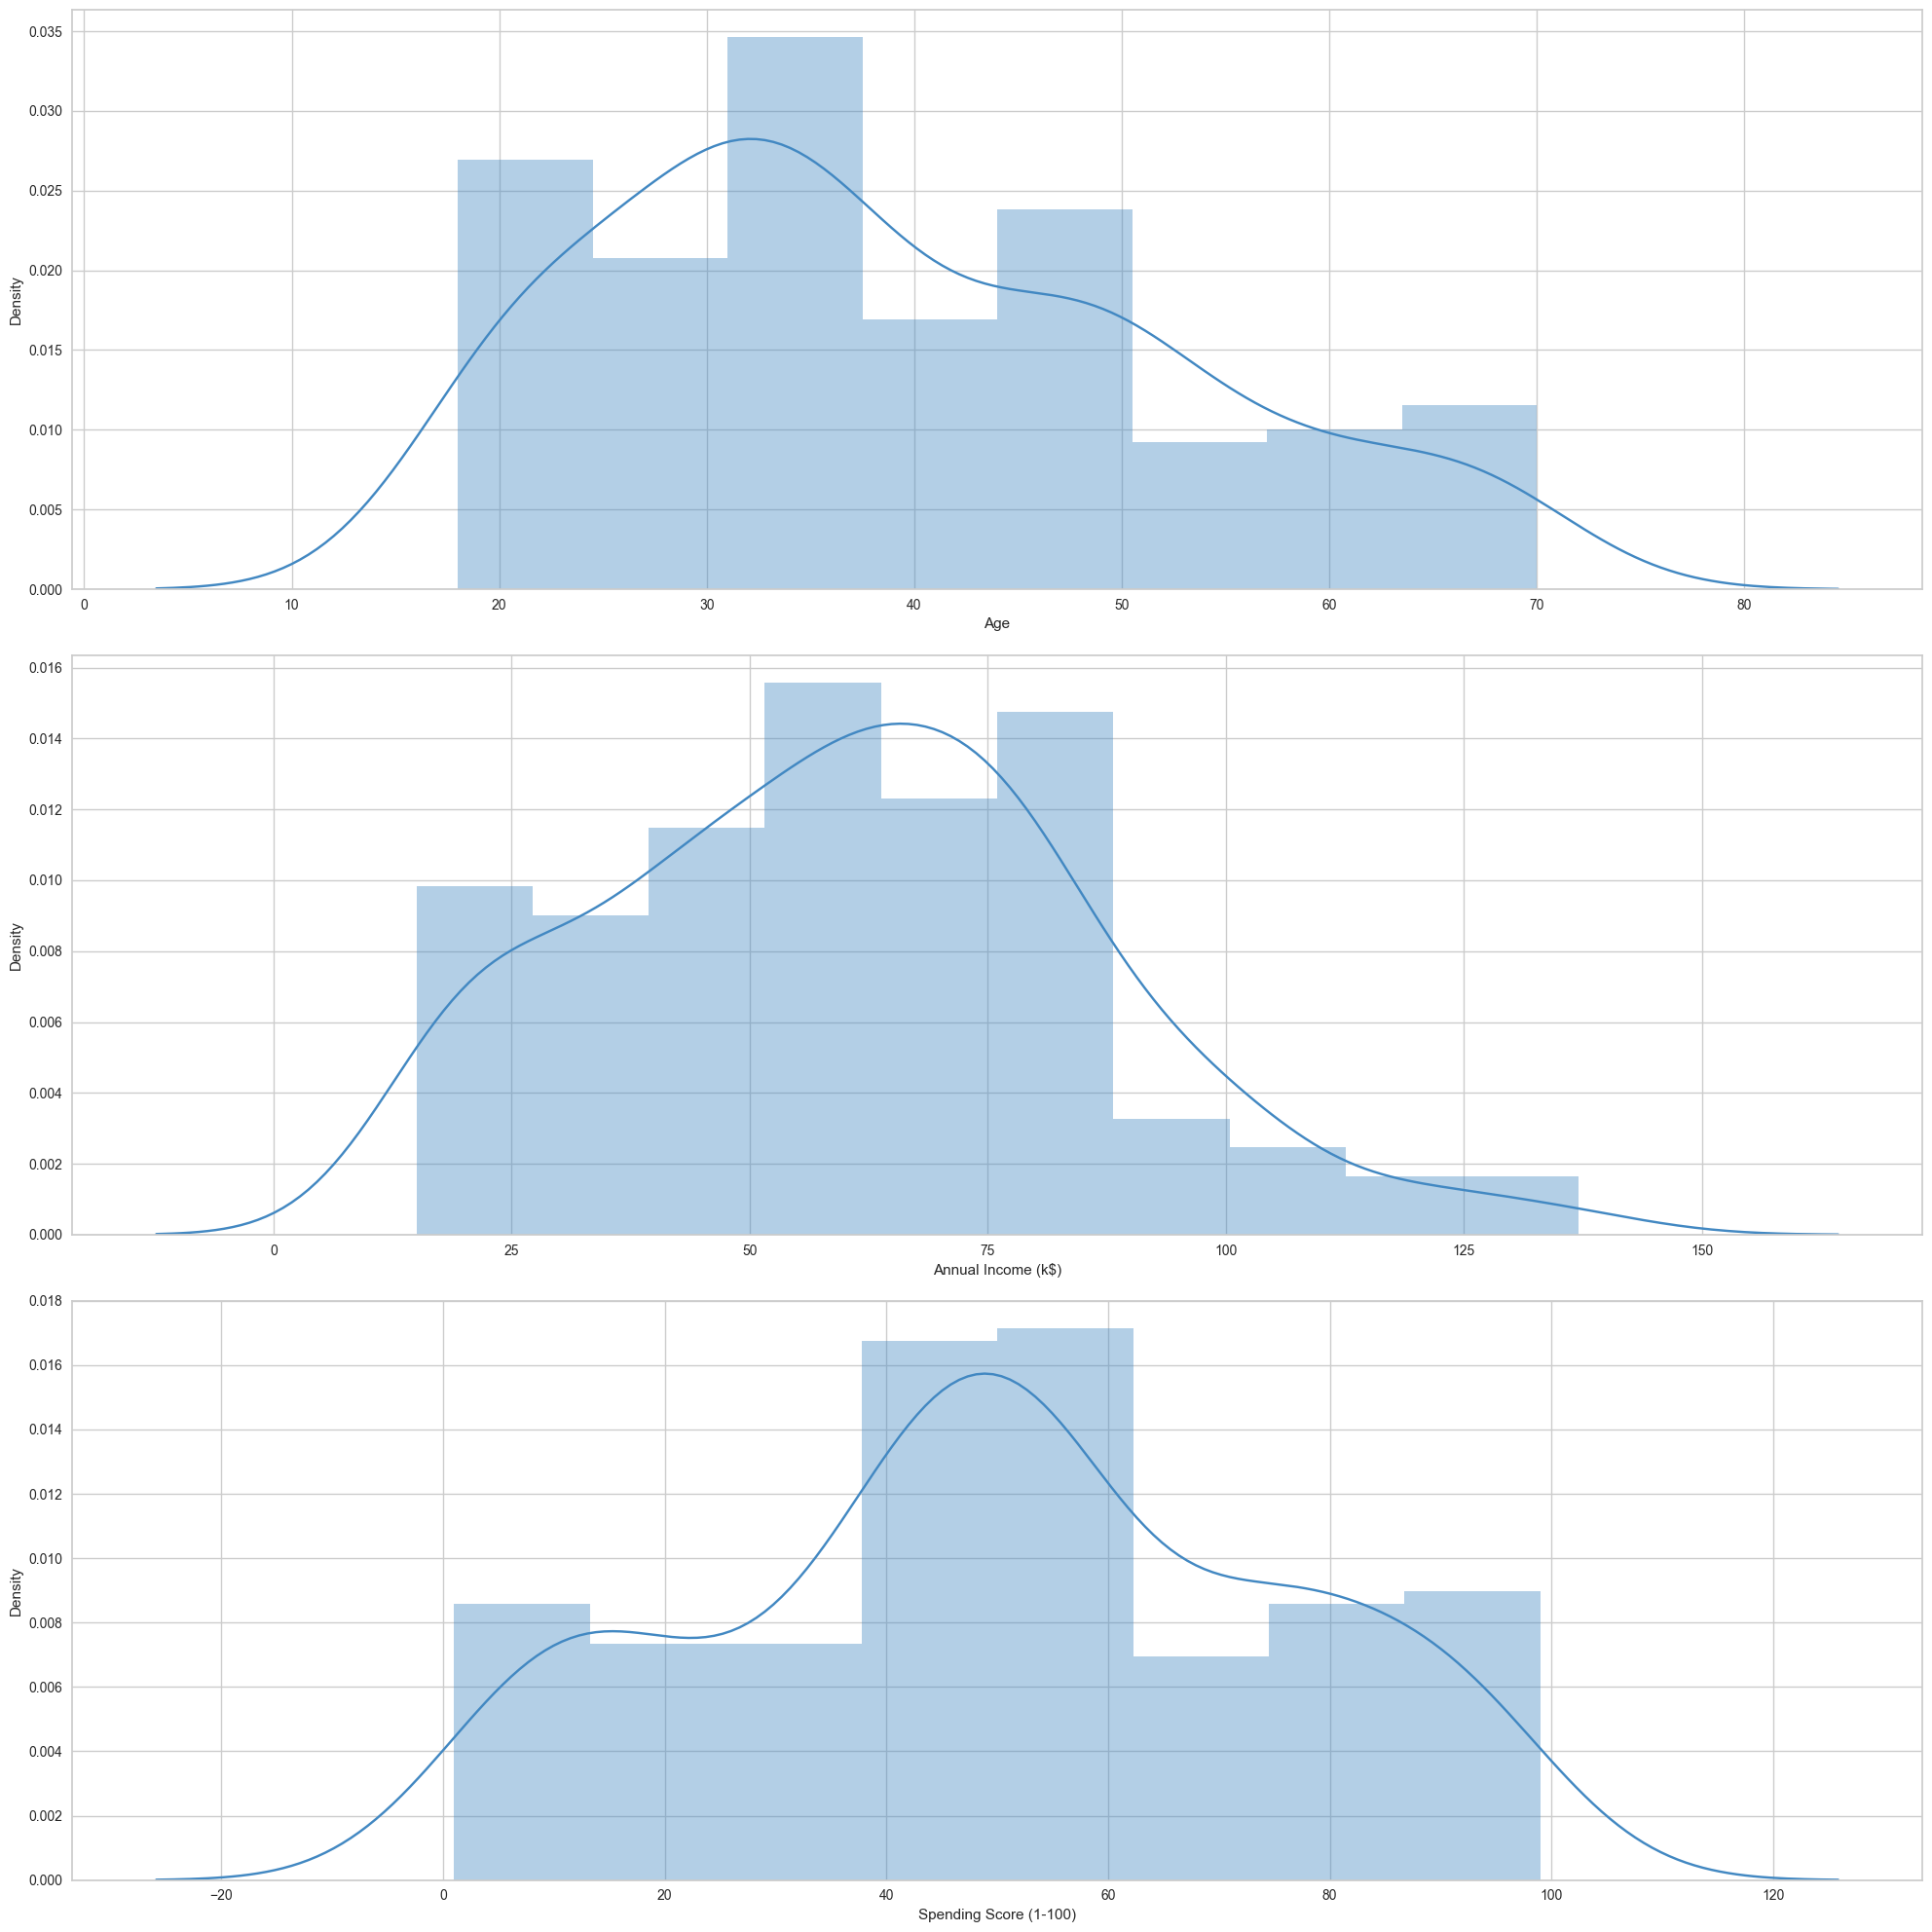

In [12]:
plt.figure(figsize = (20, 20))
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")  
    plt.tight_layout()

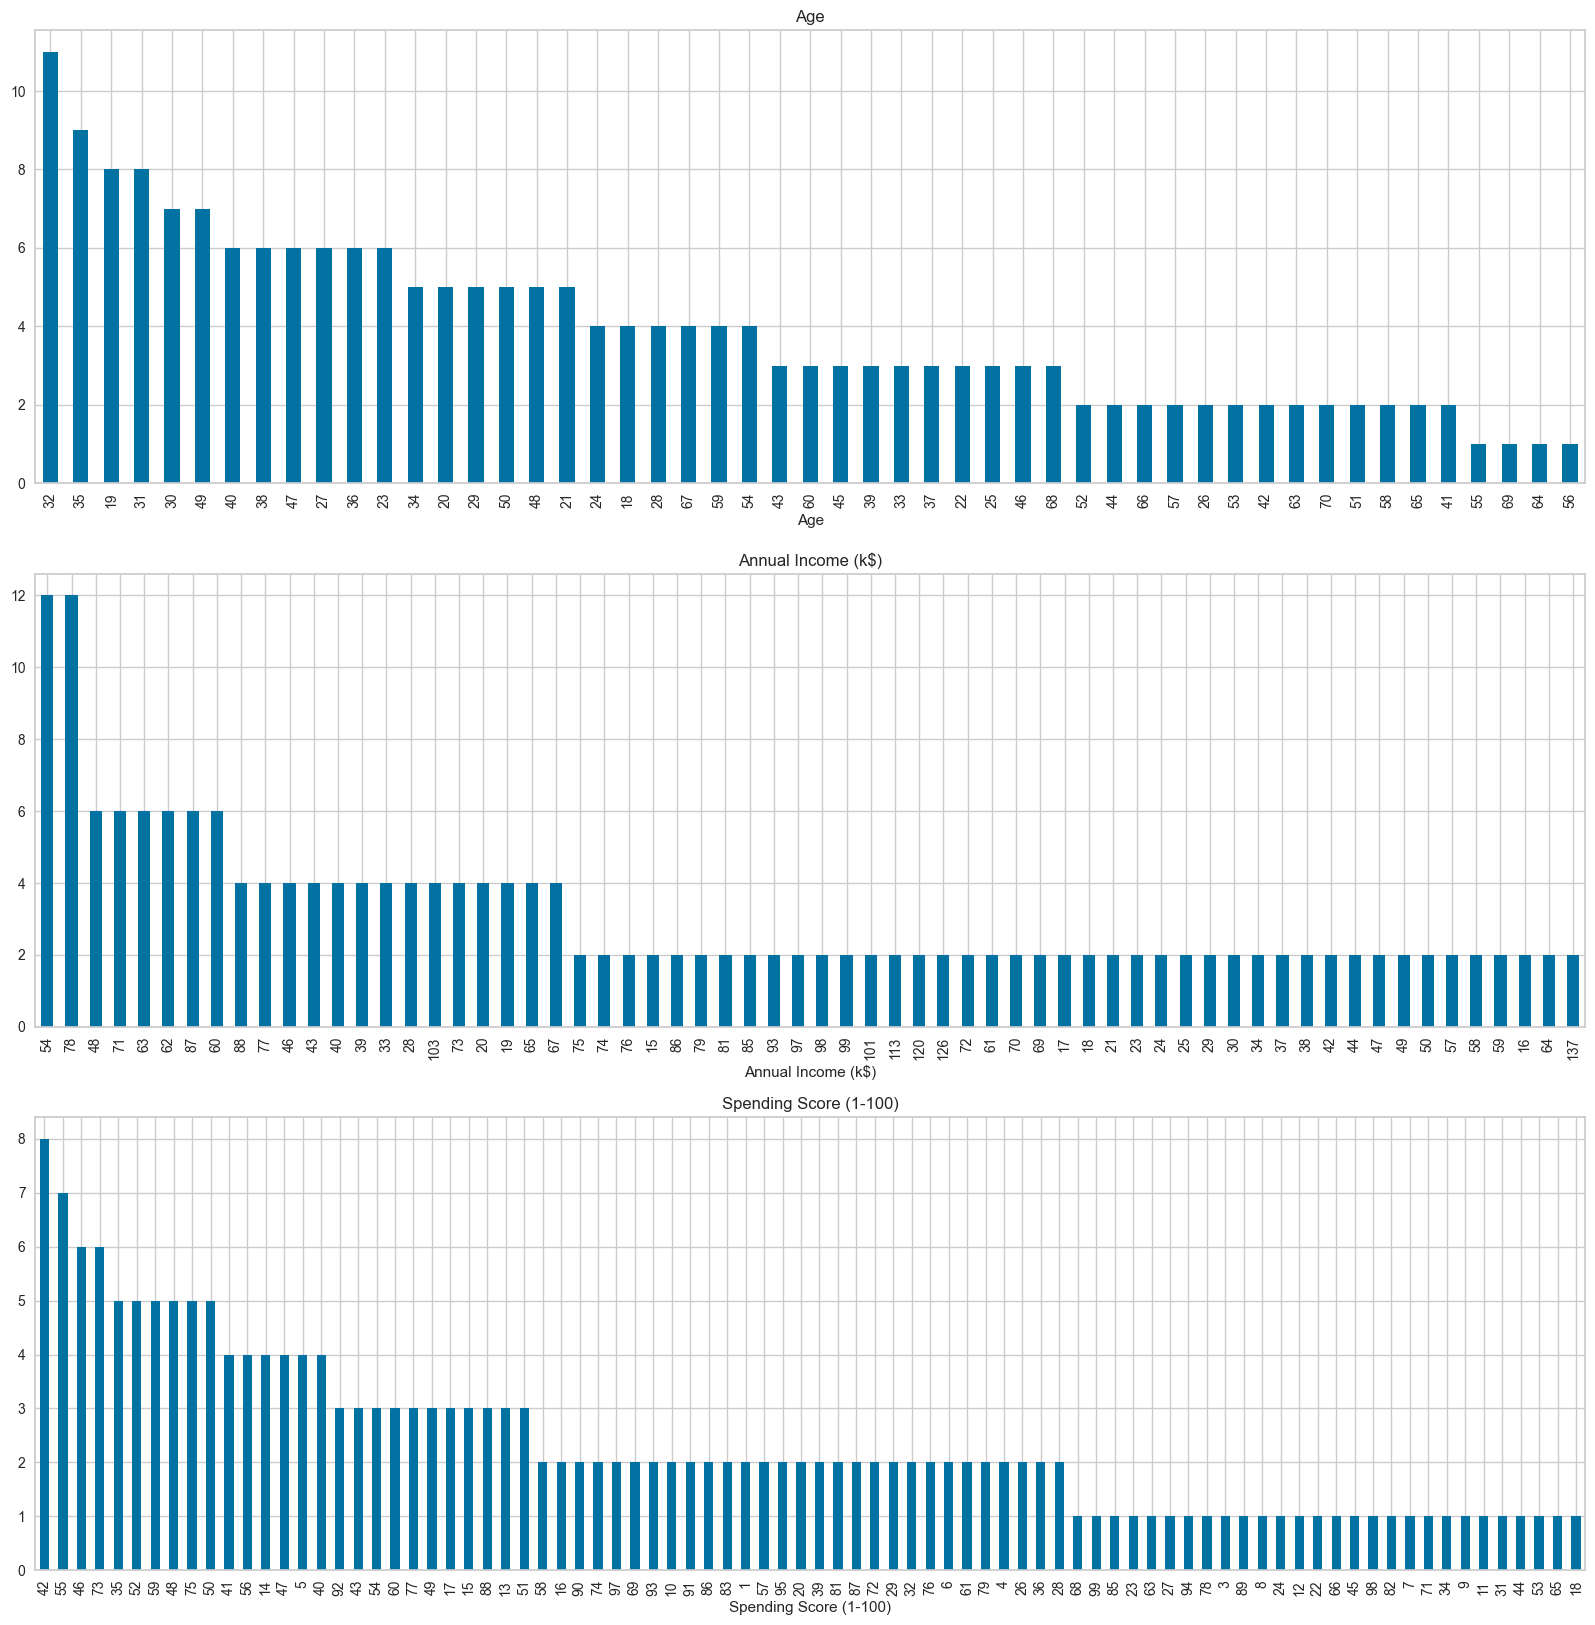

In [13]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
      plt.subplot(3, 1, i+1)
      plt.title(column[i])
      df[column[i]].value_counts().plot.bar(figsize = (20, 20))

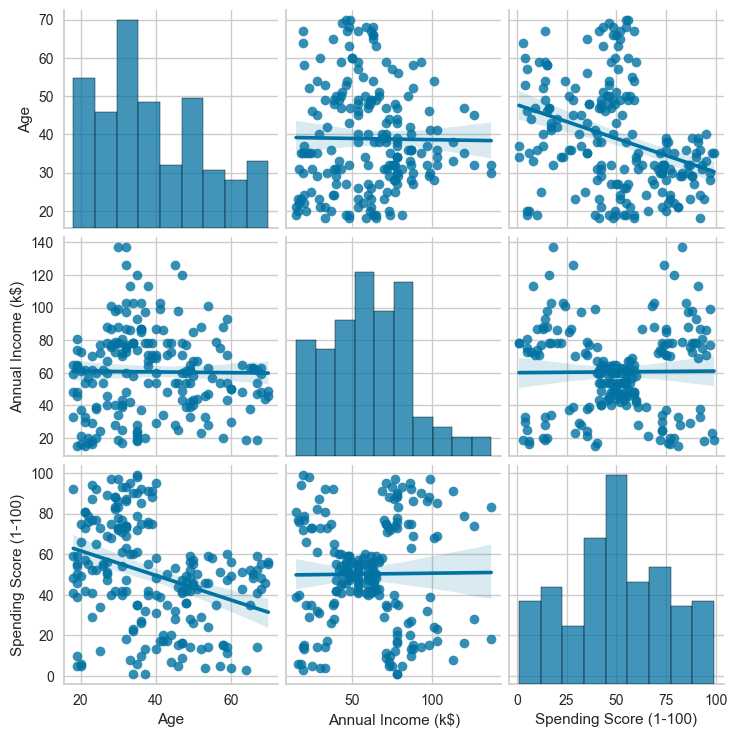

In [14]:
sns.pairplot(df, kind="reg")

<Axes: >

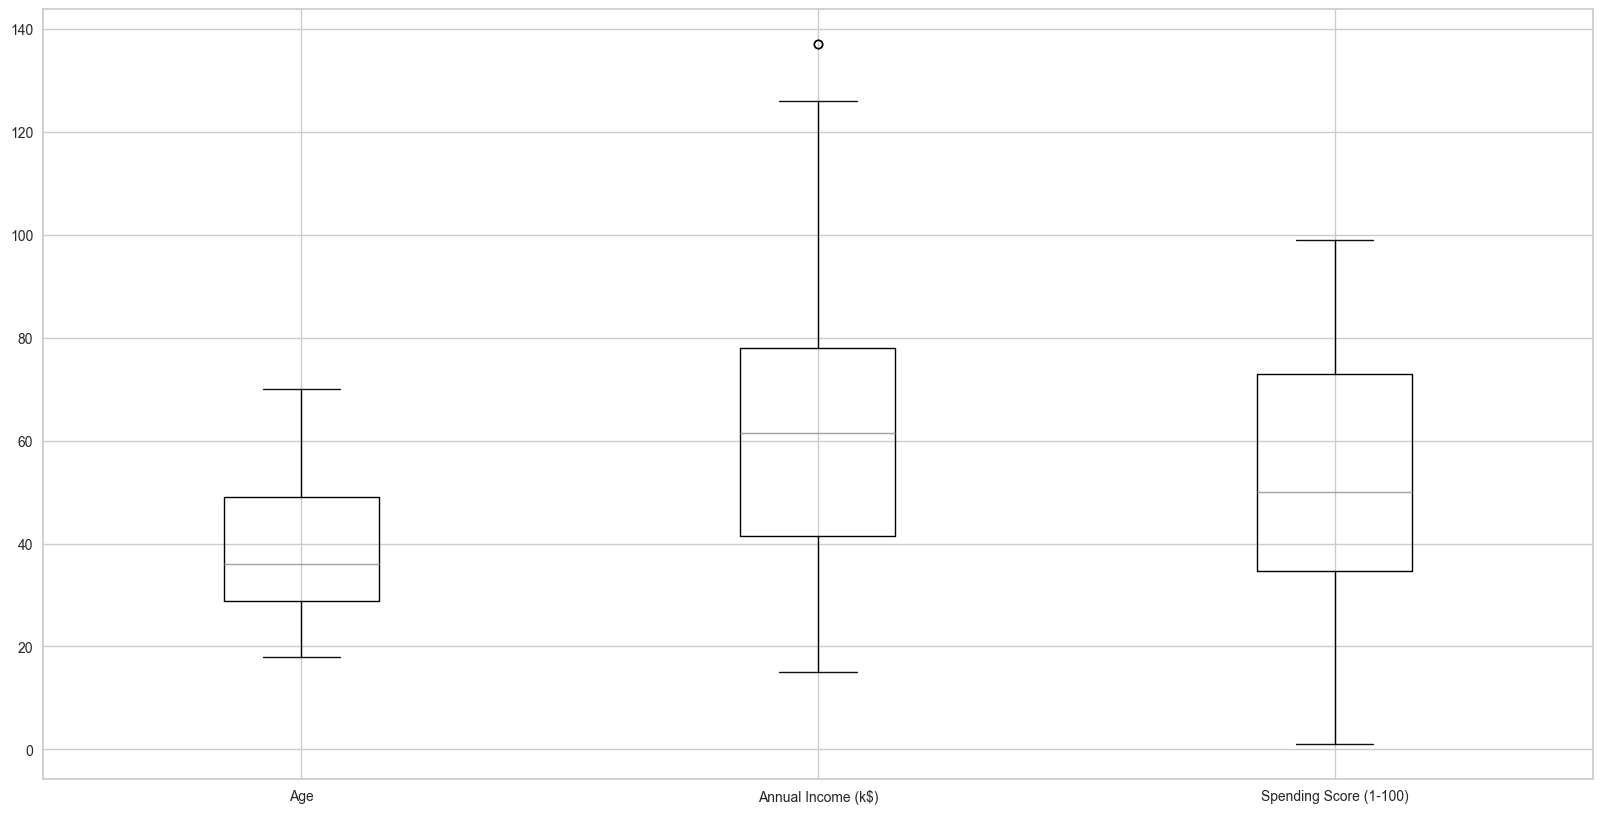

In [15]:
plt.figure(figsize =(20,10))
df.boxplot()

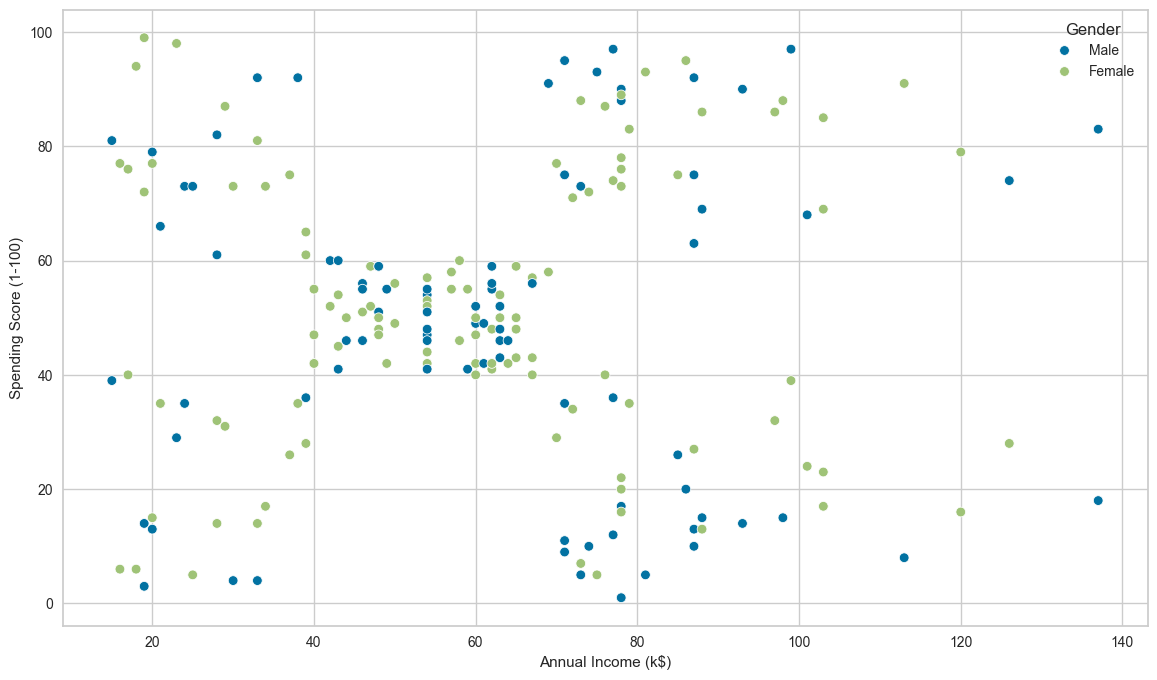

In [16]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue="Gender")
plt.show()

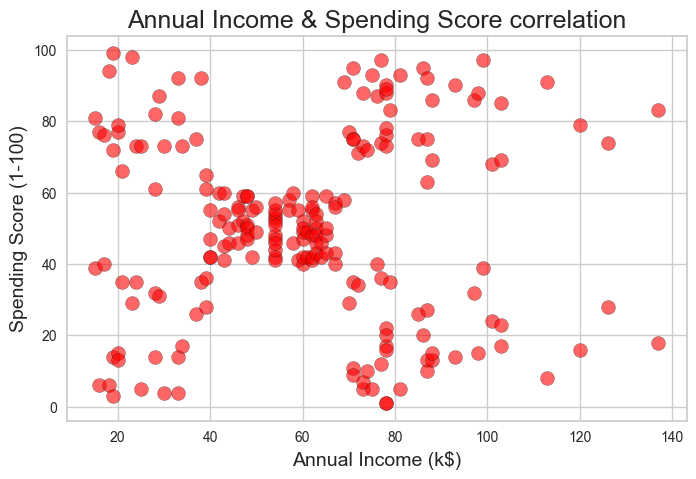

In [17]:
plt.figure(figsize=(8,5))
plt.title("Annual Income & Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

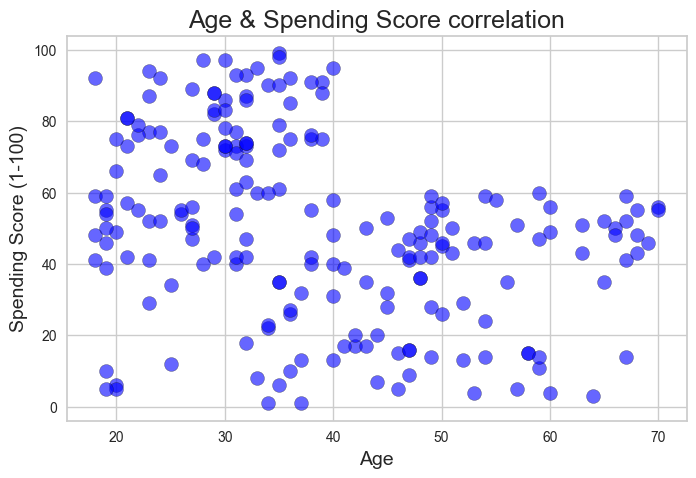

In [18]:
plt.figure(figsize=(8,5))
plt.title("Age & Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

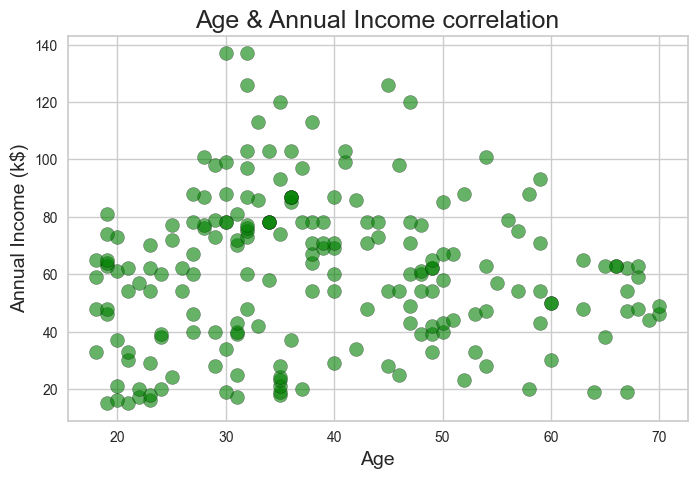

In [19]:
plt.figure(figsize=(8,5))
plt.title("Age & Annual Income correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='green',edgecolor='k',alpha=0.6, s=100)
plt.show()

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### K_Means Clustering

In [20]:
df_2 = df.drop(columns="Gender")
df_2

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [21]:
# function to compute hopkins's statistic for the dataframe X
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [22]:
hopkins(df_2, 1)

0.7018329441282816

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [23]:
X1 = df.loc[:,['Age','Spending Score (1-100)']]
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [24]:
X1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [25]:
hopkins(X1, 1)

0.7073254589994132

####  I will determine the default number of clusters.

In [26]:
K_means_model = KMeans(n_clusters=5,
                       random_state=42)
K_means_model.fit_predict(X1)


array([2, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 2, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 1, 2,
       1, 2, 4, 2, 2, 2, 4, 2, 2, 4, 1, 1, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       1, 4, 2, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 1, 4, 2, 4, 1, 2, 1, 4, 2,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 1, 2, 2, 2, 4, 4, 1, 4, 2, 1, 2, 0, 2, 0, 1, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 2, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0,
       3, 0])

In [27]:
hopkins(X1, 1)

0.7010593735067305

#### *ii. Determine optimal number of clusters*

In [28]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)


Text(0.5, 1.0, 'elbow method')

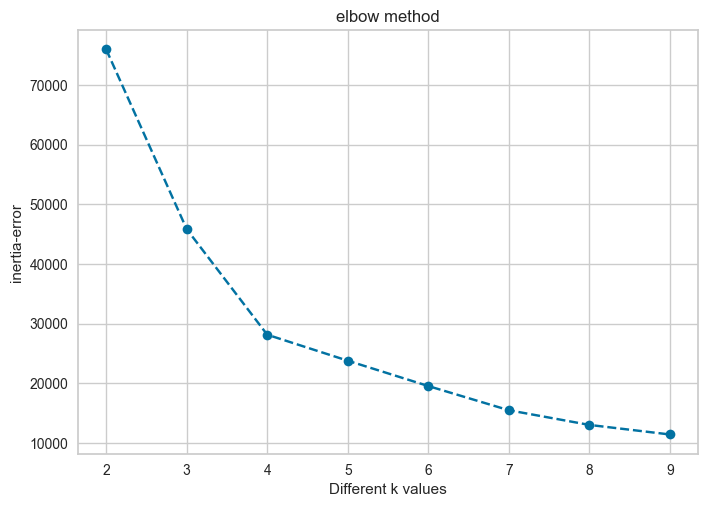

In [29]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [30]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4354.060042
4     4245.001183
5     4052.329207
6     2458.566268
7     1602.337955
dtype: float64

In [31]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X1)
    distances = kmeanModel.transform(X1) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

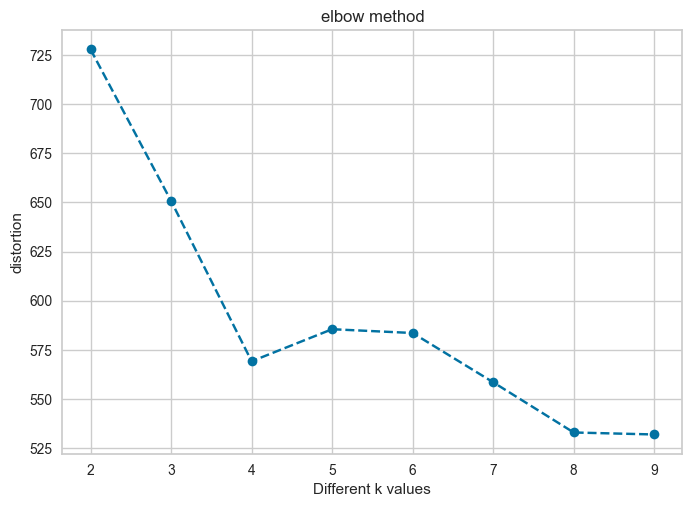

In [32]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [33]:
silhouette_score(X1, K_means_model.labels_)

0.44526667994351227

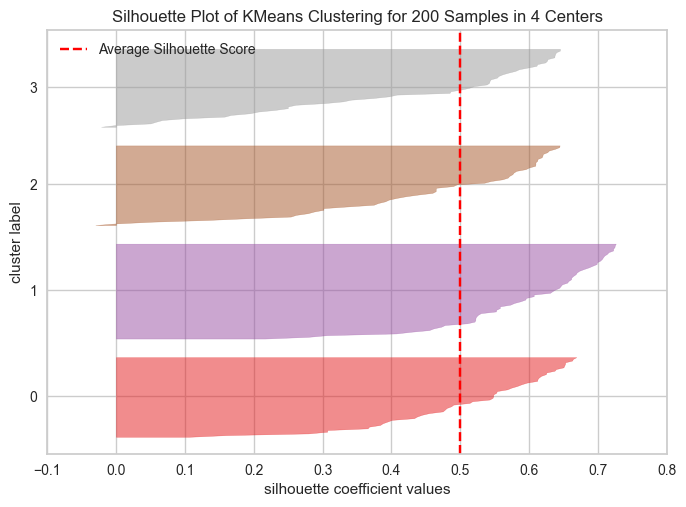

In [34]:
model_4 = KMeans(n_clusters=4,
                random_state=42)         
visualizer = SilhouetteVisualizer(model_4)

visualizer.fit(X1)   
visualizer.poof();


In [35]:
for i in range(4):
    label = (model_4.labels_== i)
    print(f"mean silhouette score for label {i:<5} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0     : 0.5091299145013191
mean silhouette score for label 1     : 0.5960779476836082
mean silhouette score for label 2     : 0.45429047261675404
mean silhouette score for label 3     : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### Why silhouette_score is negative?

####indication that both variables move in the opposite direction

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [36]:
K_means_model = KMeans(n_clusters=4,
                       random_state=42)
K_means_model.fit_predict(X1)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [37]:
clusters = K_means_model.labels_

In [38]:
X1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [39]:
X1["predicted_clusters"] = clusters
X1.head()

,Age,Spending Score (1-100),predicted_clusters
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3


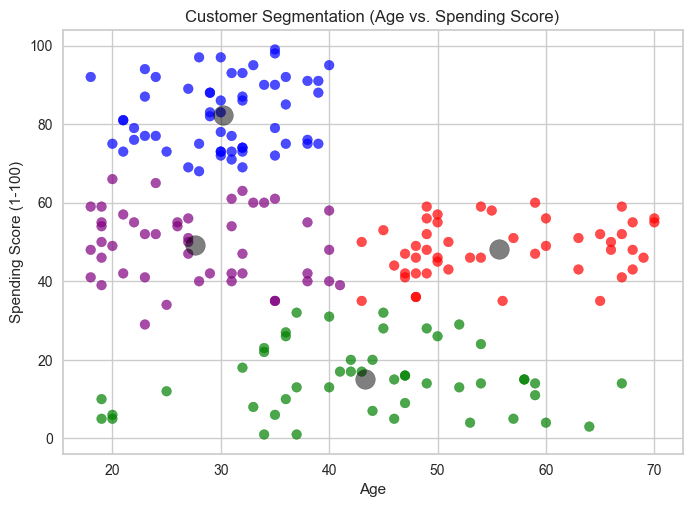

In [40]:

centers = K_means_model.cluster_centers_
# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

# Assuming X1.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.scatter(X1['Age'],
            X1['Spending Score (1-100)'],
            c=[cluster_colors[i] for i in X1.predicted_clusters],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()


In [41]:
labels={0:'old med spenders', 1:'diverse low spenders',
        2:'young high spenders', 3:'young med spenders'}

X1['Meaningful Labels']=X1['predicted_clusters'].map(labels)
X1.head()

,Age,Spending Score (1-100),predicted_clusters,Meaningful Labels
0,19,39,3,young med spenders
1,21,81,1,diverse low spenders
2,20,6,2,young high spenders
3,23,77,1,diverse low spenders
4,31,40,3,young med spenders


### Clustering based on Annual Income and Spending Score

In [42]:
X2=df.iloc[:, [2,3]]
X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [43]:
K_means_model_2 = KMeans(n_clusters=5,
                       random_state=42)
K_means_model_2.fit_predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [44]:
hopkins(X2, 1)

0.6906502035322041

#### *ii. Determine optimal number of clusters*

In [45]:
ssd = []

K2 = range(2,10)

for k in K2:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)


Text(0.5, 1.0, 'elbow method')

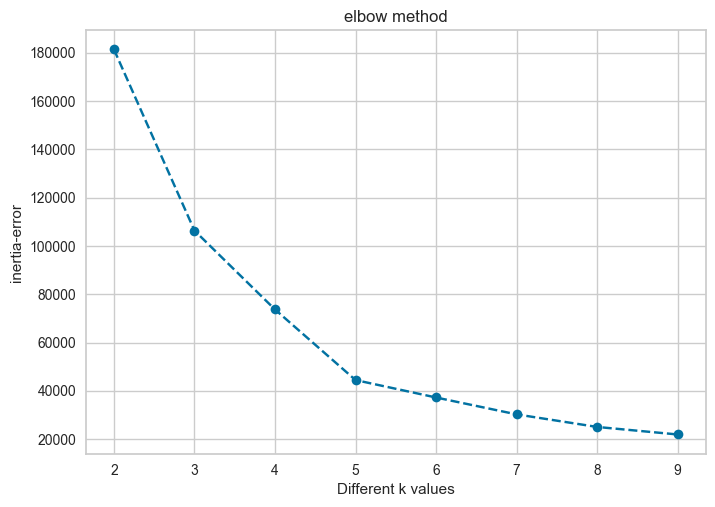

In [46]:
plt.plot(K2, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [47]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6992.470893
6     5204.926014
7     3119.622814
dtype: float64

In [48]:
K2 = range(2, 10)
distortion = []
for k in K2:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X2)
    distances = kmeanModel.transform(X2) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

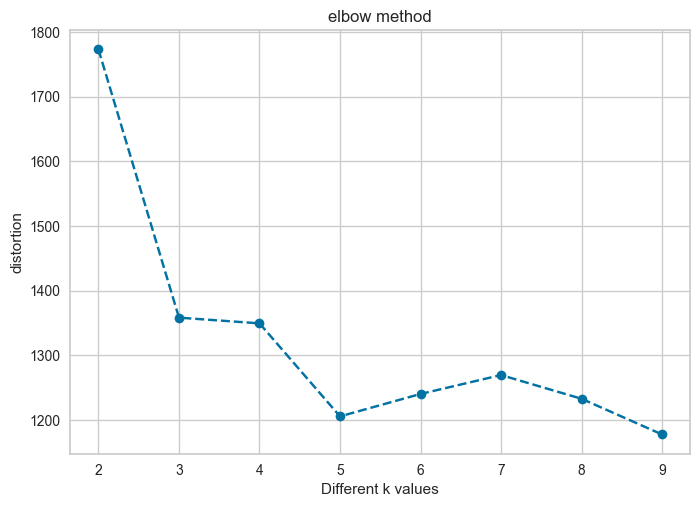

In [49]:
plt.plot(K2, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [50]:
silhouette_score(X2, K_means_model_2.labels_)

0.553931997444648

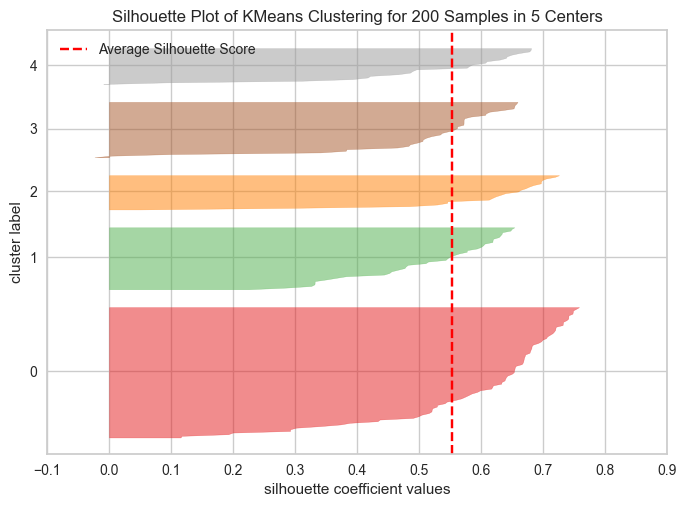

In [51]:

model_5 = KMeans(n_clusters=5,
                random_state=42)         
visualizer = SilhouetteVisualizer(model_5)

visualizer.fit(X2) 
visualizer.poof();


In [52]:
for i in range(5):
    label = (model_5.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5966512190217801
mean silhouette score for label 1      : 0.5091706489322517
mean silhouette score for label 2      : 0.5990128687006722
mean silhouette score for label 3      : 0.5039873487056818
mean silhouette score for label 4      : 0.5122676140736505
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [53]:
K_means_model_2 = KMeans(n_clusters=5,
                       random_state=42)
K_means_model_2.fit_predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [54]:
clusters_2 = K_means_model_2.labels_

In [55]:
X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [56]:
X2["predicted_clusters"] = clusters_2
X2.head()

,Annual Income (k$),Spending Score (1-100),predicted_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


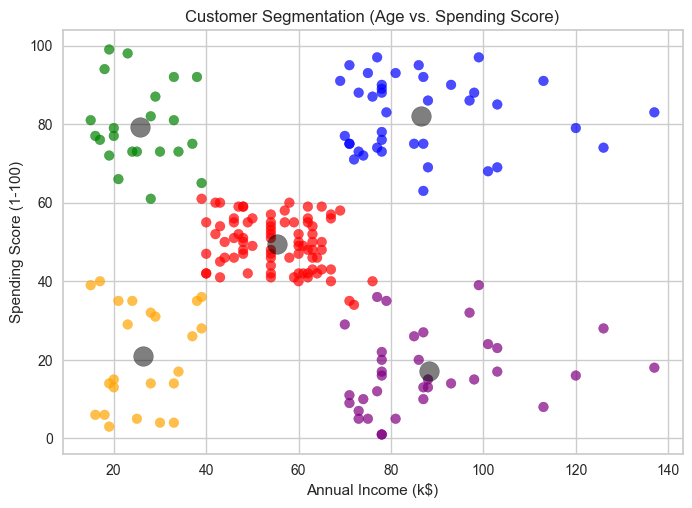

In [57]:
# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
centers = K_means_model_2.cluster_centers_
# Assuming X1.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.scatter(X2['Annual Income (k$)'],
            X2['Spending Score (1-100)'],
            c=[cluster_colors[i] for i in X2.predicted_clusters],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()

In [58]:
labels={0:'med income med spenders', 1:'high income low spenders', 
        2:'low income low spenders', 3:'low income high spenders', 4:'high income high spenders'}

X2['Meaningful Labels']=X2['predicted_clusters'].map(labels)
X2.head()

,Annual Income (k$),Spending Score (1-100),predicted_clusters,Meaningful Labels
0,15,39,4,high income high spenders
1,15,81,2,low income low spenders
2,16,6,4,high income high spenders
3,16,77,2,low income low spenders
4,17,40,4,high income high spenders


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [59]:
df_3 = df.drop(columns="Gender")
df_3

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [60]:

def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [61]:
# df_2 = df.copy()

In [62]:
hopkins(df_3, 0.1)

0.7271770312406132

### Clustering based on Age and Spending Score- x1

In [63]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [64]:
X11 = df[["Age", 'Spending Score (1-100)']]
X11

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


## Since we got a value more than 0.5 we can continue with Clustering

In [65]:
hopkins(X11, 0.1)

0.7337069105884008

In [66]:
hc_ward = linkage(y=X11, method="ward")
hc_complete = linkage(X11, "complete")
hc_average = linkage(X11, "average")
hc_single = linkage(X11, "single")

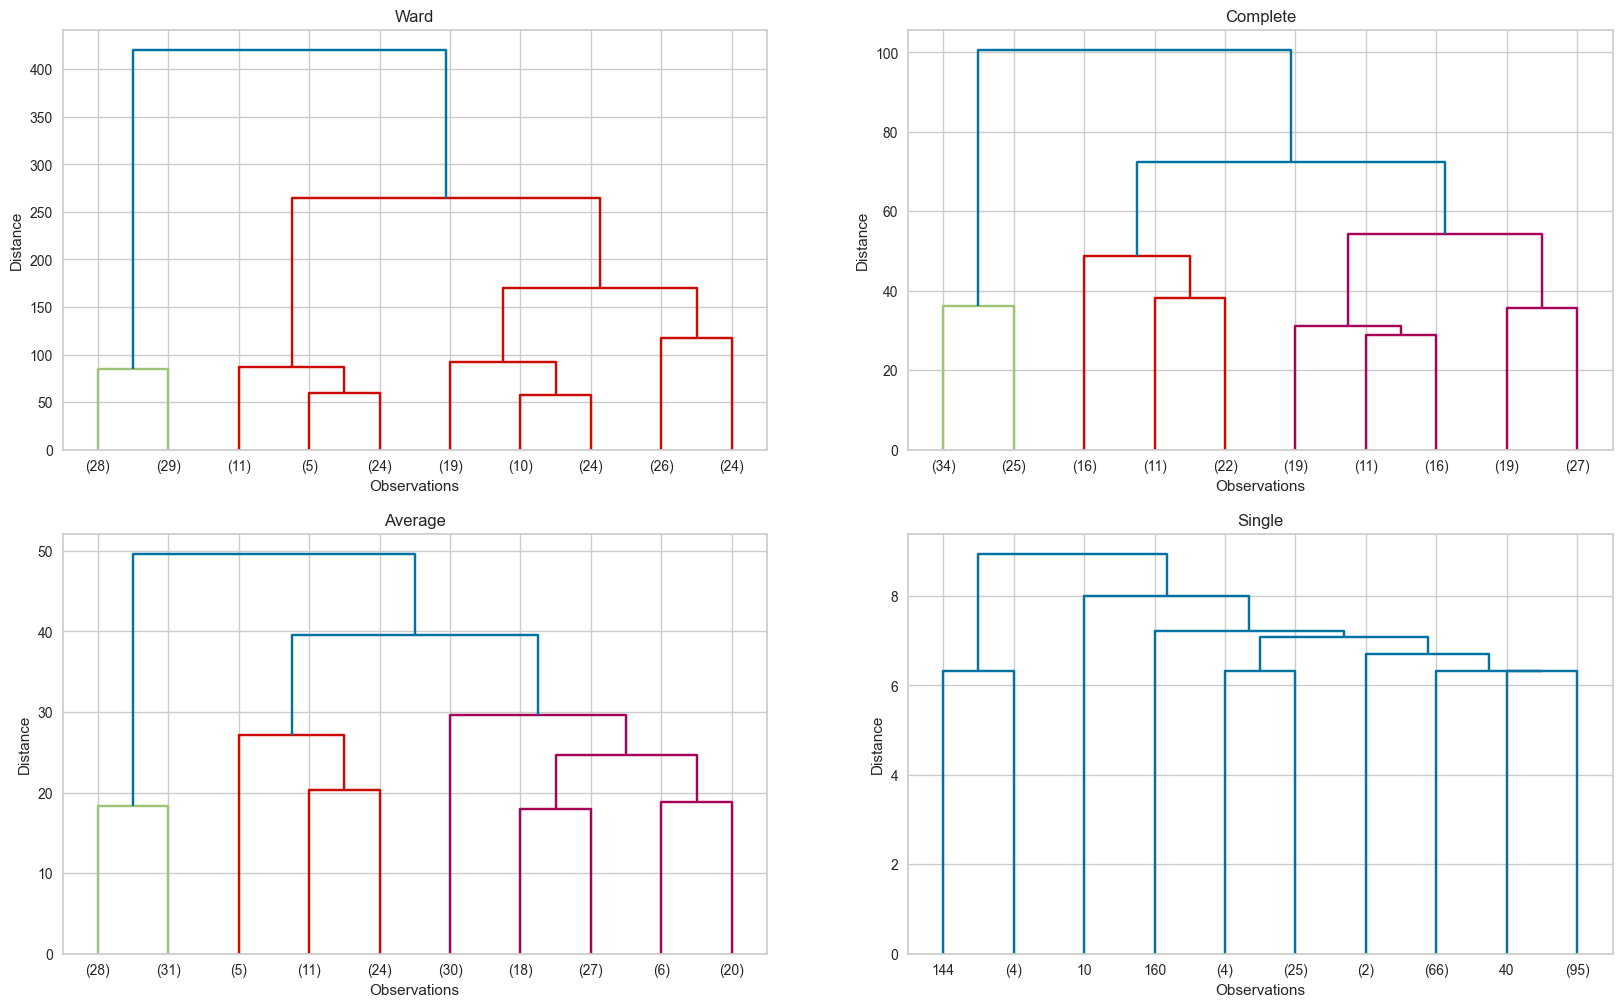

In [67]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);



## We have determend that we will use 3 clusters using ward method.

## Clustering based on Annual Income and Spending Score- x2

In [68]:
X4 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X4


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [69]:
hopkins(X4, 0.1)

0.6907039424738612

## Since we got a value more than 0.5 we can continue with Clustering

In [70]:
hc_ward2 = linkage(y=X4, method="ward")
hc_complete2 = linkage(X4, "complete")
hc_average2 = linkage(X4, "average")
hc_single2 = linkage(X4, "single")

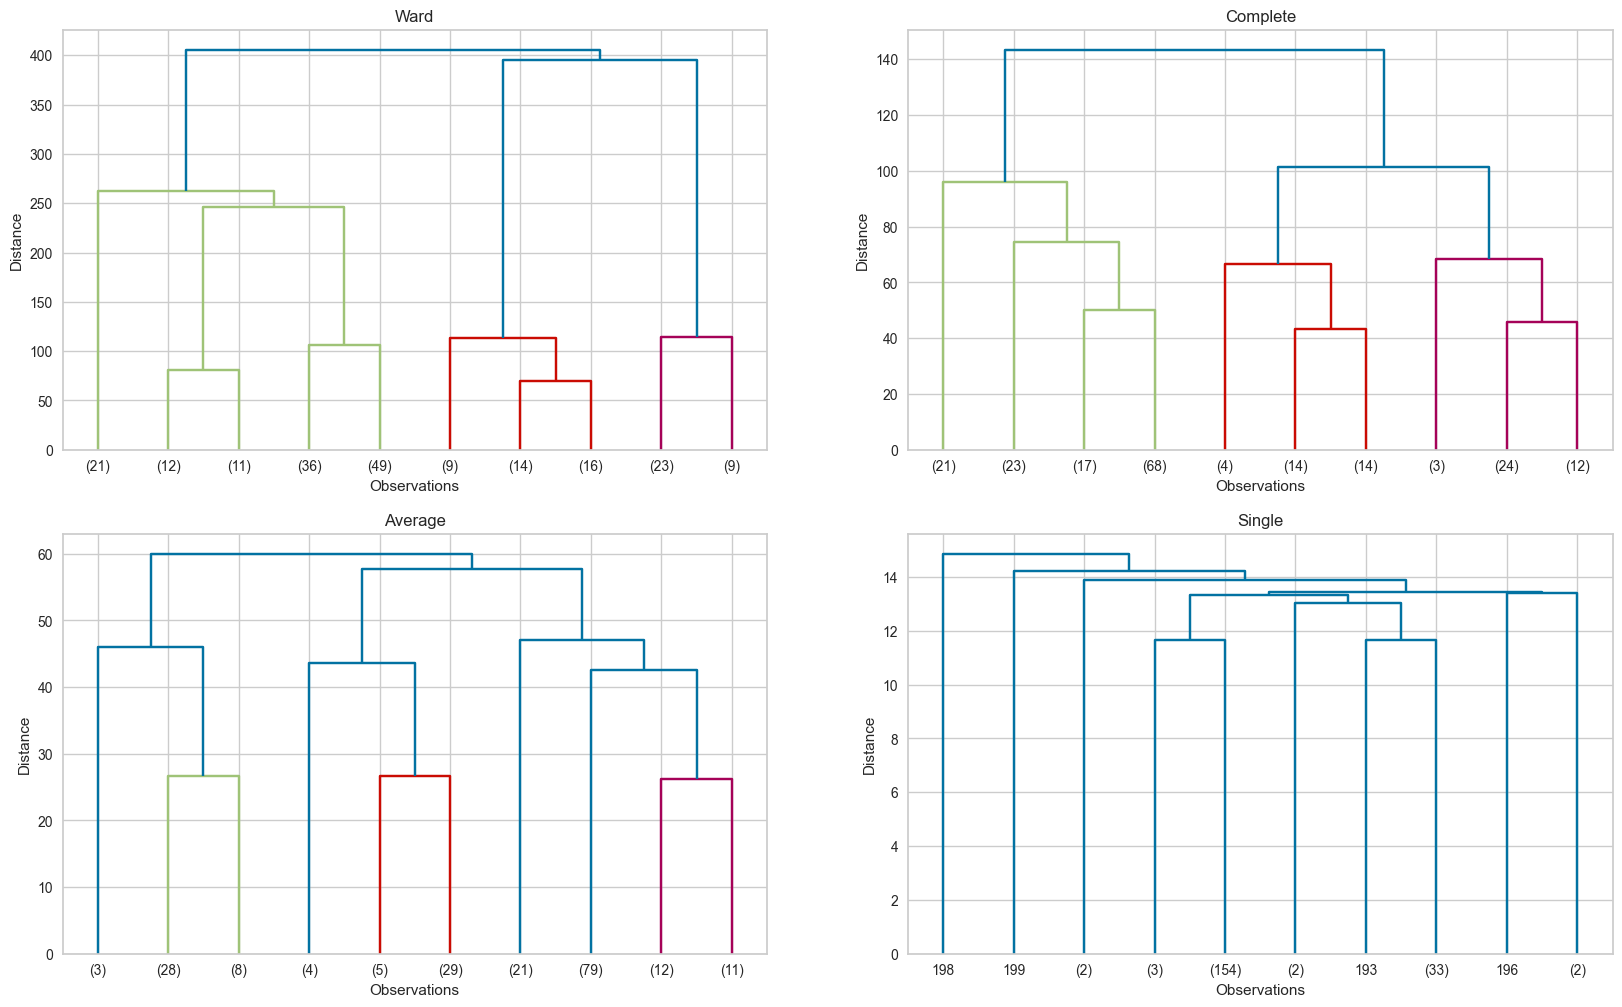

In [71]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single2, leaf_font_size = 10, truncate_mode='lastp', p=10);

## We have determend that we will use 3 clusters using ward method.

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [72]:
model =  AgglomerativeClustering(n_clusters=3,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_x1 = model.fit_predict(X11)

In [73]:
model.labels_

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1], dtype=int64)

In [74]:
clusters = model.fit_predict(X11)
X11["clusters"] = clusters
X11

,Age,Spending Score (1-100),clusters
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,2


#### Annual Income and Spending Score- x2

In [75]:

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X4)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X4, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [76]:
X4_model2 = AgglomerativeClustering(n_clusters=5,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_x4 = X4_model2.fit_predict(X4)

In [77]:
X4_model2.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [78]:
X4.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [79]:
clusters = X4_model2.labels_
X4["clusters"] = clusters
X4

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


### iii. *Visualizing and Labeling All the Clusters* 

In [80]:
X11.columns

Index(['Age', 'Spending Score (1-100)', 'clusters'], dtype='object')

#### Age and Spending Score- x1

Text(0.5, 1.0, 'Age vs Spending score')

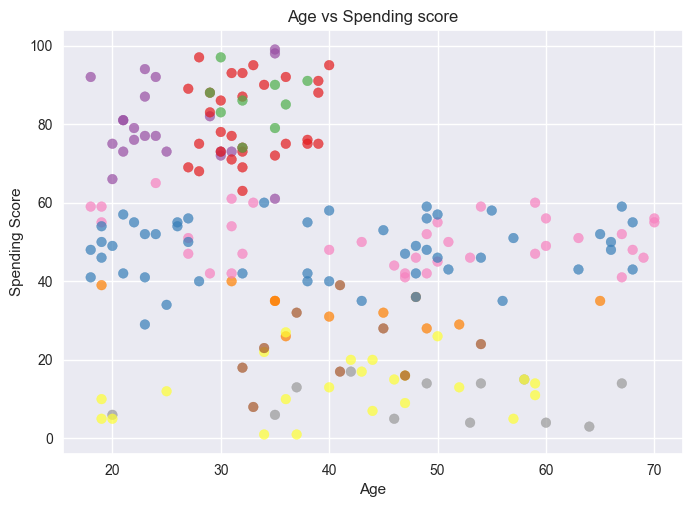

In [81]:
sns.set_style("darkgrid")

plt.scatter(X11["Age"],
            X11["Spending Score (1-100)"],
            c=model.labels_,
            cmap="Set1",
            alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending score')


### As we can see, there is no relationship between age and spending score.
<!-- 
We have seen there is a big difference in spending between Male and Female, and we think, it is affecting the results, and we cannot determine any relationship between the varibales -->

In [82]:
X4.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'clusters'], dtype='object')

Text(0.5, 1.0, 'Annual Income vs Spending score')

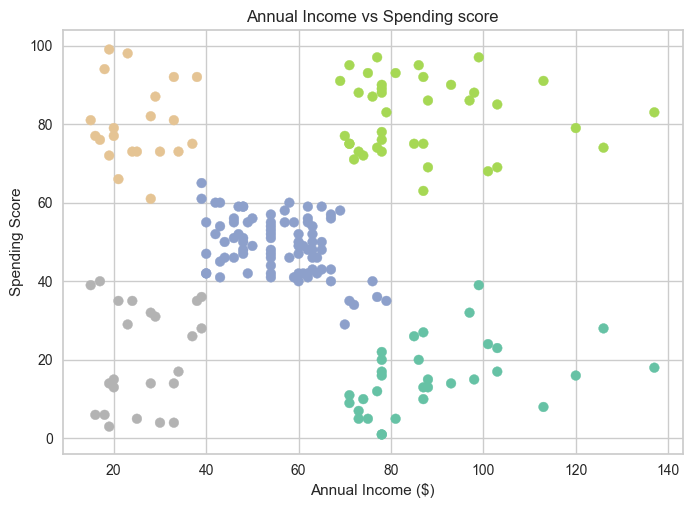

In [83]:
sns.set_style("whitegrid")
plt.scatter(data=X4, x="Annual Income (k$)", y="Spending Score (1-100)", c='clusters', cmap='Set2')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending score')

### As we can see, there is no relationship between the two variables, and each cluster exhibits distinct behavior.

#### Annual Income and Spending Score- x2

In [84]:
X4.clusters.value_counts()

clusters
1    85
2    39
0    32
4    23
3    21
Name: count, dtype: int64

### Conclusion

#### Interpretation based on Age and Spending Score- x1

In [85]:
X11

,Age,Spending Score (1-100),clusters
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,2


<Axes: >

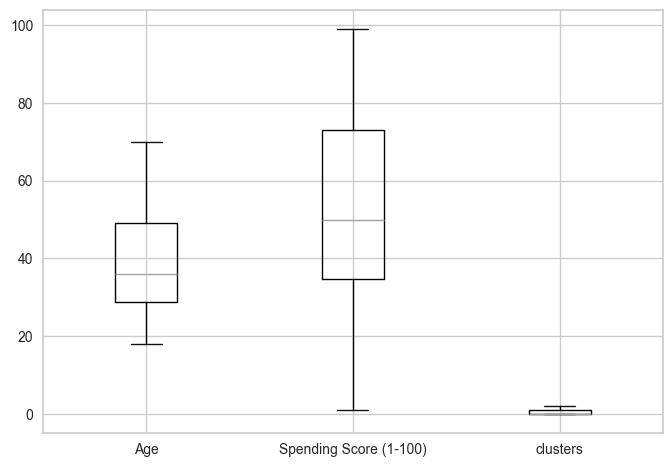

In [86]:
X11.boxplot()

[Text(0, 0, '103'), Text(0, 0, '57'), Text(0, 0, '40')]

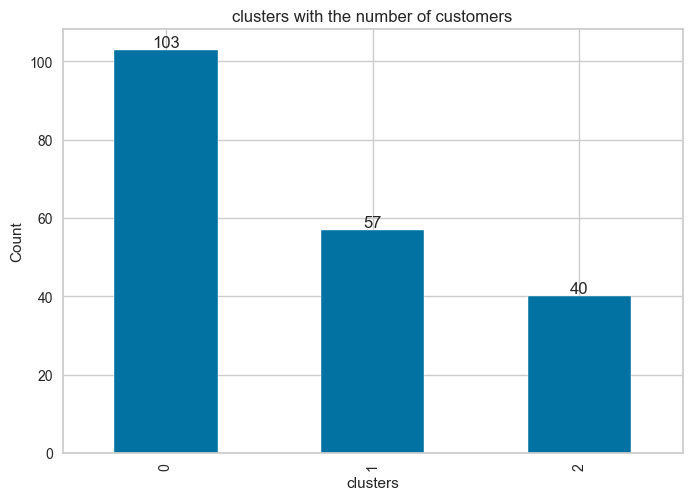

In [87]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X11.clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [109]:
df["cluster_Age_Spending_Score"] = X11.clusters
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,0,4
1,Male,21,15,81,1,3
2,Female,20,16,6,2,4
3,Female,23,16,77,1,3
4,Female,31,17,40,0,4


In [95]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,0


In [96]:
df.groupby(["Gender", "cluster_Age_Spending_Score"]).mean()


Age  Annual Income (k$)  \
Gender cluster_Age_Spending_Score                                  
Female 0                           41.114754           56.393443   
       1                           29.787879           63.696970   
       2                           43.111111           60.777778   
Male   0                           43.714286           52.880952   
       1                           30.708333           69.333333   
       2                           42.272727           72.318182   

                                   Spending Score (1-100)  
Gender cluster_Age_Spending_Score                          
Female 0                                        45.983607  
       1                                        81.727273  
       2                                        14.944444  
Male   0                                        48.809524  
       1                                        83.208333  
       2                                        10.090909

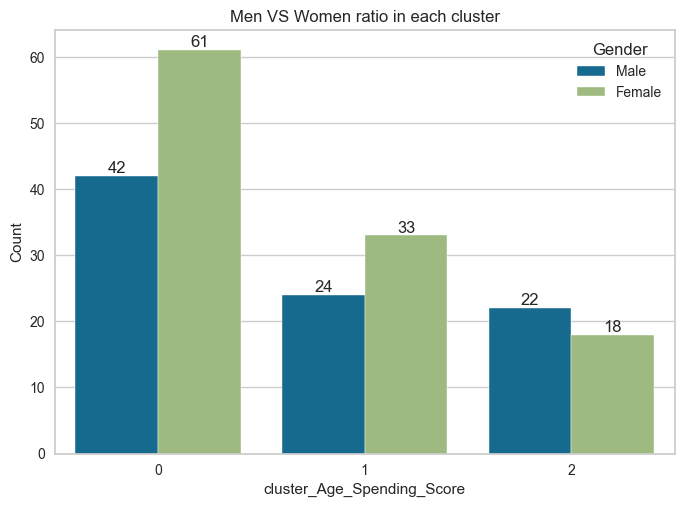

In [97]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

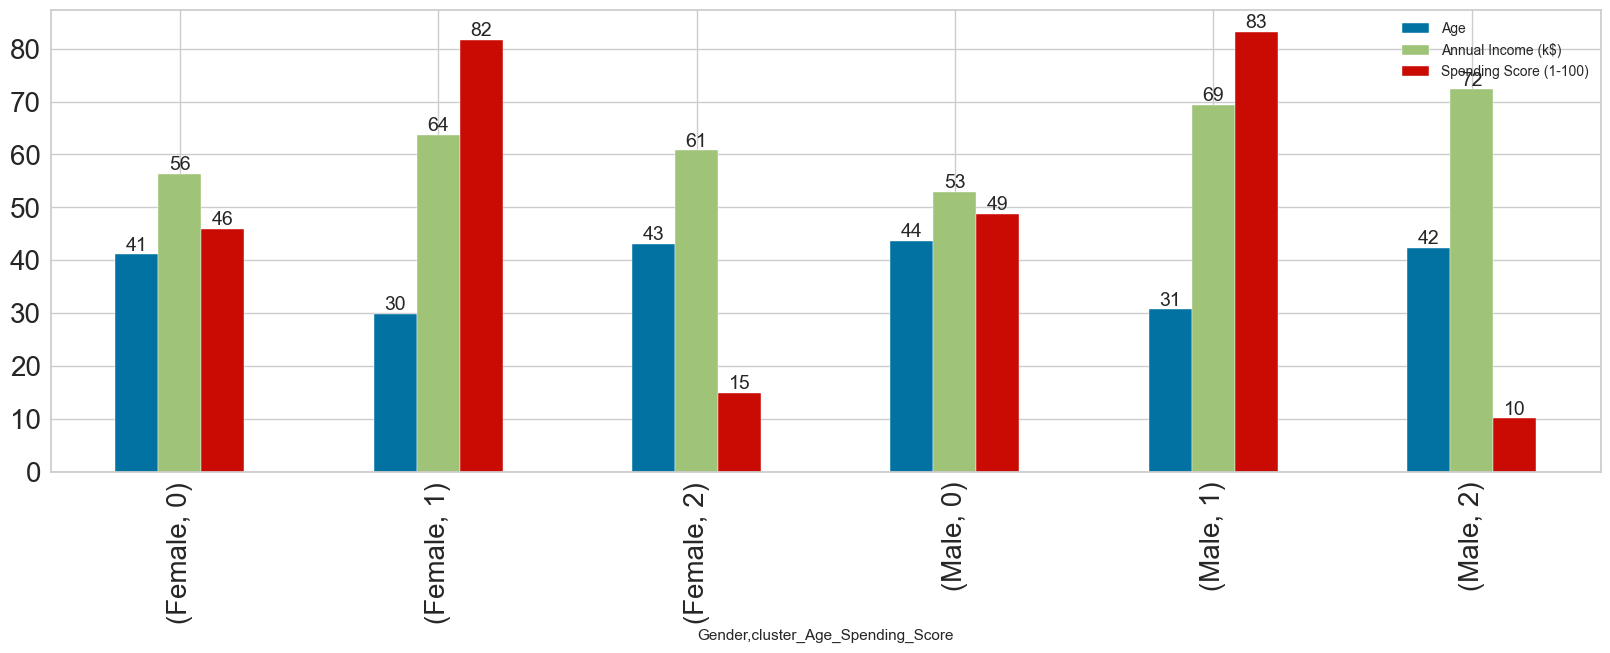

In [98]:
ax = df.groupby(["Gender", "cluster_Age_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

In [110]:
####cluster 0 for female : The average age is around 41,and the annual income around 56 and the speeding score is around 46
####cluster 1 for female : The average age is around 30,and the annual income around 64 and the speeding score is around 82
####cluster 2 for female : The average age is around 43,and the annual income around 61 and the speeding score is around 15(very low)
####cluster 0 for male :   The average age is around 44,and the annual income around 53 and the speeding score is around 49
####cluster 1 for male :   The average age is around 31,and the annual income around 69 and the speeding score is around 83(very high)
####cluster 2 for male :   The average age is around 42,and the annual income around 72 and the speeding score is around 10(very low)

### So, having discovered that there is a significant disparity in expenditure between men and women, we conclude there are no differences.

#### Interpretation based on Annual Income and Spending Score- x2

In [100]:
X4

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


<Axes: >

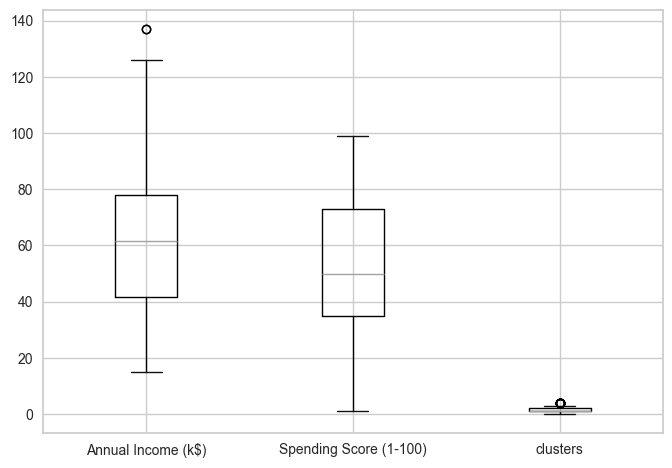

In [101]:
X4.boxplot()

[Text(0, 0, '85'),
 Text(0, 0, '39'),
 Text(0, 0, '32'),
 Text(0, 0, '23'),
 Text(0, 0, '21')]

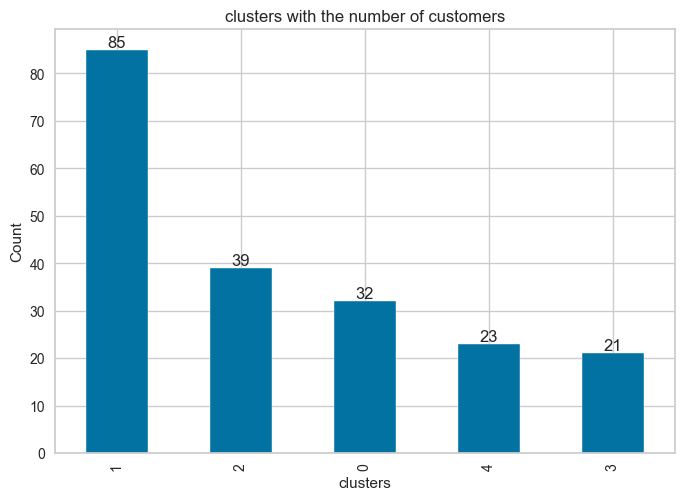

In [103]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X4.clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [104]:
df["cluster_Annual_Income_Spending_Score"] = X4.clusters
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,0,4
1,Male,21,15,81,1,3
2,Female,20,16,6,2,4
3,Female,23,16,77,1,3
4,Female,31,17,40,0,4


In [105]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()


Age  Annual Income (k$)  \
Gender cluster_Annual_Income_Spending_Score                                  
Female 0                                     43.785714           93.285714   
       1                                     40.509804           55.784314   
       2                                     32.190476           86.047619   
       3                                     25.583333           24.583333   
       4                                     43.214286           27.357143   
Male   0                                     38.833333           86.388889   
       1                                     45.441176           55.852941   
       2                                     33.277778           87.111111   
       3                                     25.000000           25.777778   
       4                                     48.333333           24.666667   

                                             Spending Score (1-100)  \
Gender cluster_Annual_Income_Spending_Score                           
Female 0                                                  20.642857   
       1                                                  48.647059   
       2                                                  81.666667   
       3                                                  81.833333   
       4                                                  21.714286   
Male   0                                                  11.666667   
       1                                                  49.852941   
       2                                                  82.666667   
       3                                                  77.666667   
       4                                                  19.666667   

                                             cluster_Age_Spending_Score  
Gender cluster_Annual_Income_Spending_Score                              
Female 0                                                       1.428571  
       1                                                       0.000000  
       2                                                       1.000000  
       3                                                       1.000000  
       4                                                       1.142857  
Male   0                                                       1.888889  
       1                                                       0.000000  
       2                                                       0.944444  
       3                                                       0.777778  
       4                                                       1.111111

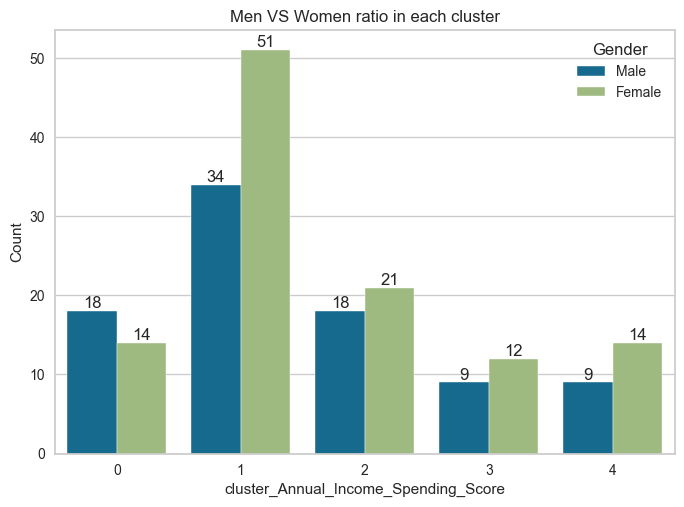

In [106]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

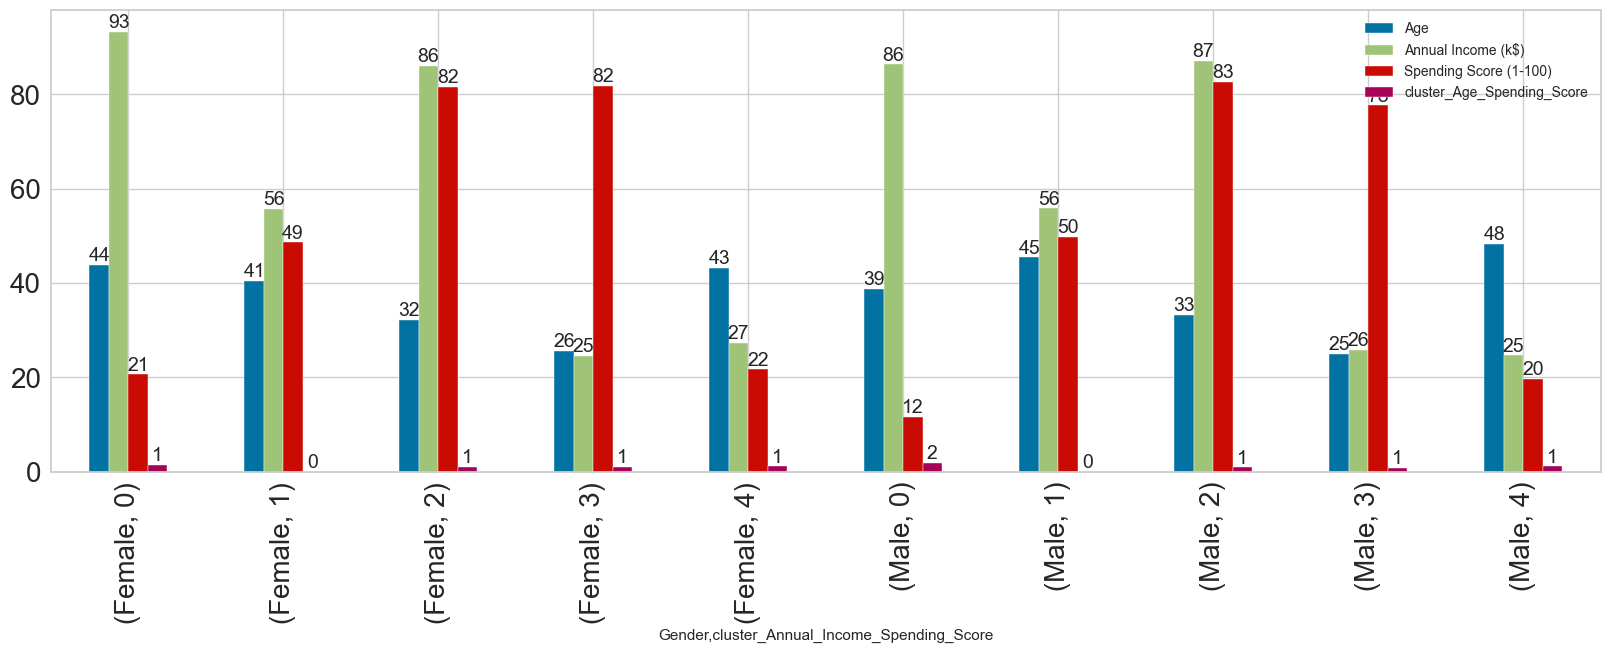

In [107]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

In [111]:
####cluster 0 for female : The average age is around 44,and the annual income around 93(very high) and the speeding score is around 21(very low)
####cluster 1 for female : The average age is around 41,and the annual income around 56 and the speeding score is around 49
####cluster 2 for female : The average age is around 32,and the annual income around 86(very high) and the speeding score is around 82(very high)
####cluster 3 for female : The average age is around 26,and the annual income around 25(very low) and the speeding score is around 82(very high)
####cluster 4 for female : The average age is around 43,and the annual income around 27 and the speeding score is around 22
####cluster 0 for male :   The average age is around 39,and the annual income around 85(very high) and the speeding score is around 12(very low)
####cluster 1 for male :   The average age is around 45,and the annual income around 56 and the speeding score is around 50
####cluster 2 for male :   The average age is around 33,and the annual income around 87(very high) and the speeding score is around 83(very high)
####cluster 3 for male :   The average age is around 25,and the annual income around 26 and the speeding score is around 78(very high)
####cluster 4 for male :   The average age is around 48,and the annual income around 25 and the speeding score is around 20

### So, having discovered that there is a significant disparity in expenditure between men and women, we conclude there are no differences.

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___